In [1]:
%load_ext autoreload
%autoreload 2
import LCN_model
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
from tqdm import tqdm
import matplotlib.patches as mpatches
import imageio
import os
import matplotlib.image as mpimg
import matplotlib.pylab as pl

SyntaxError: invalid syntax (LCN_model.py, line 1136)

## LCN vs CNN

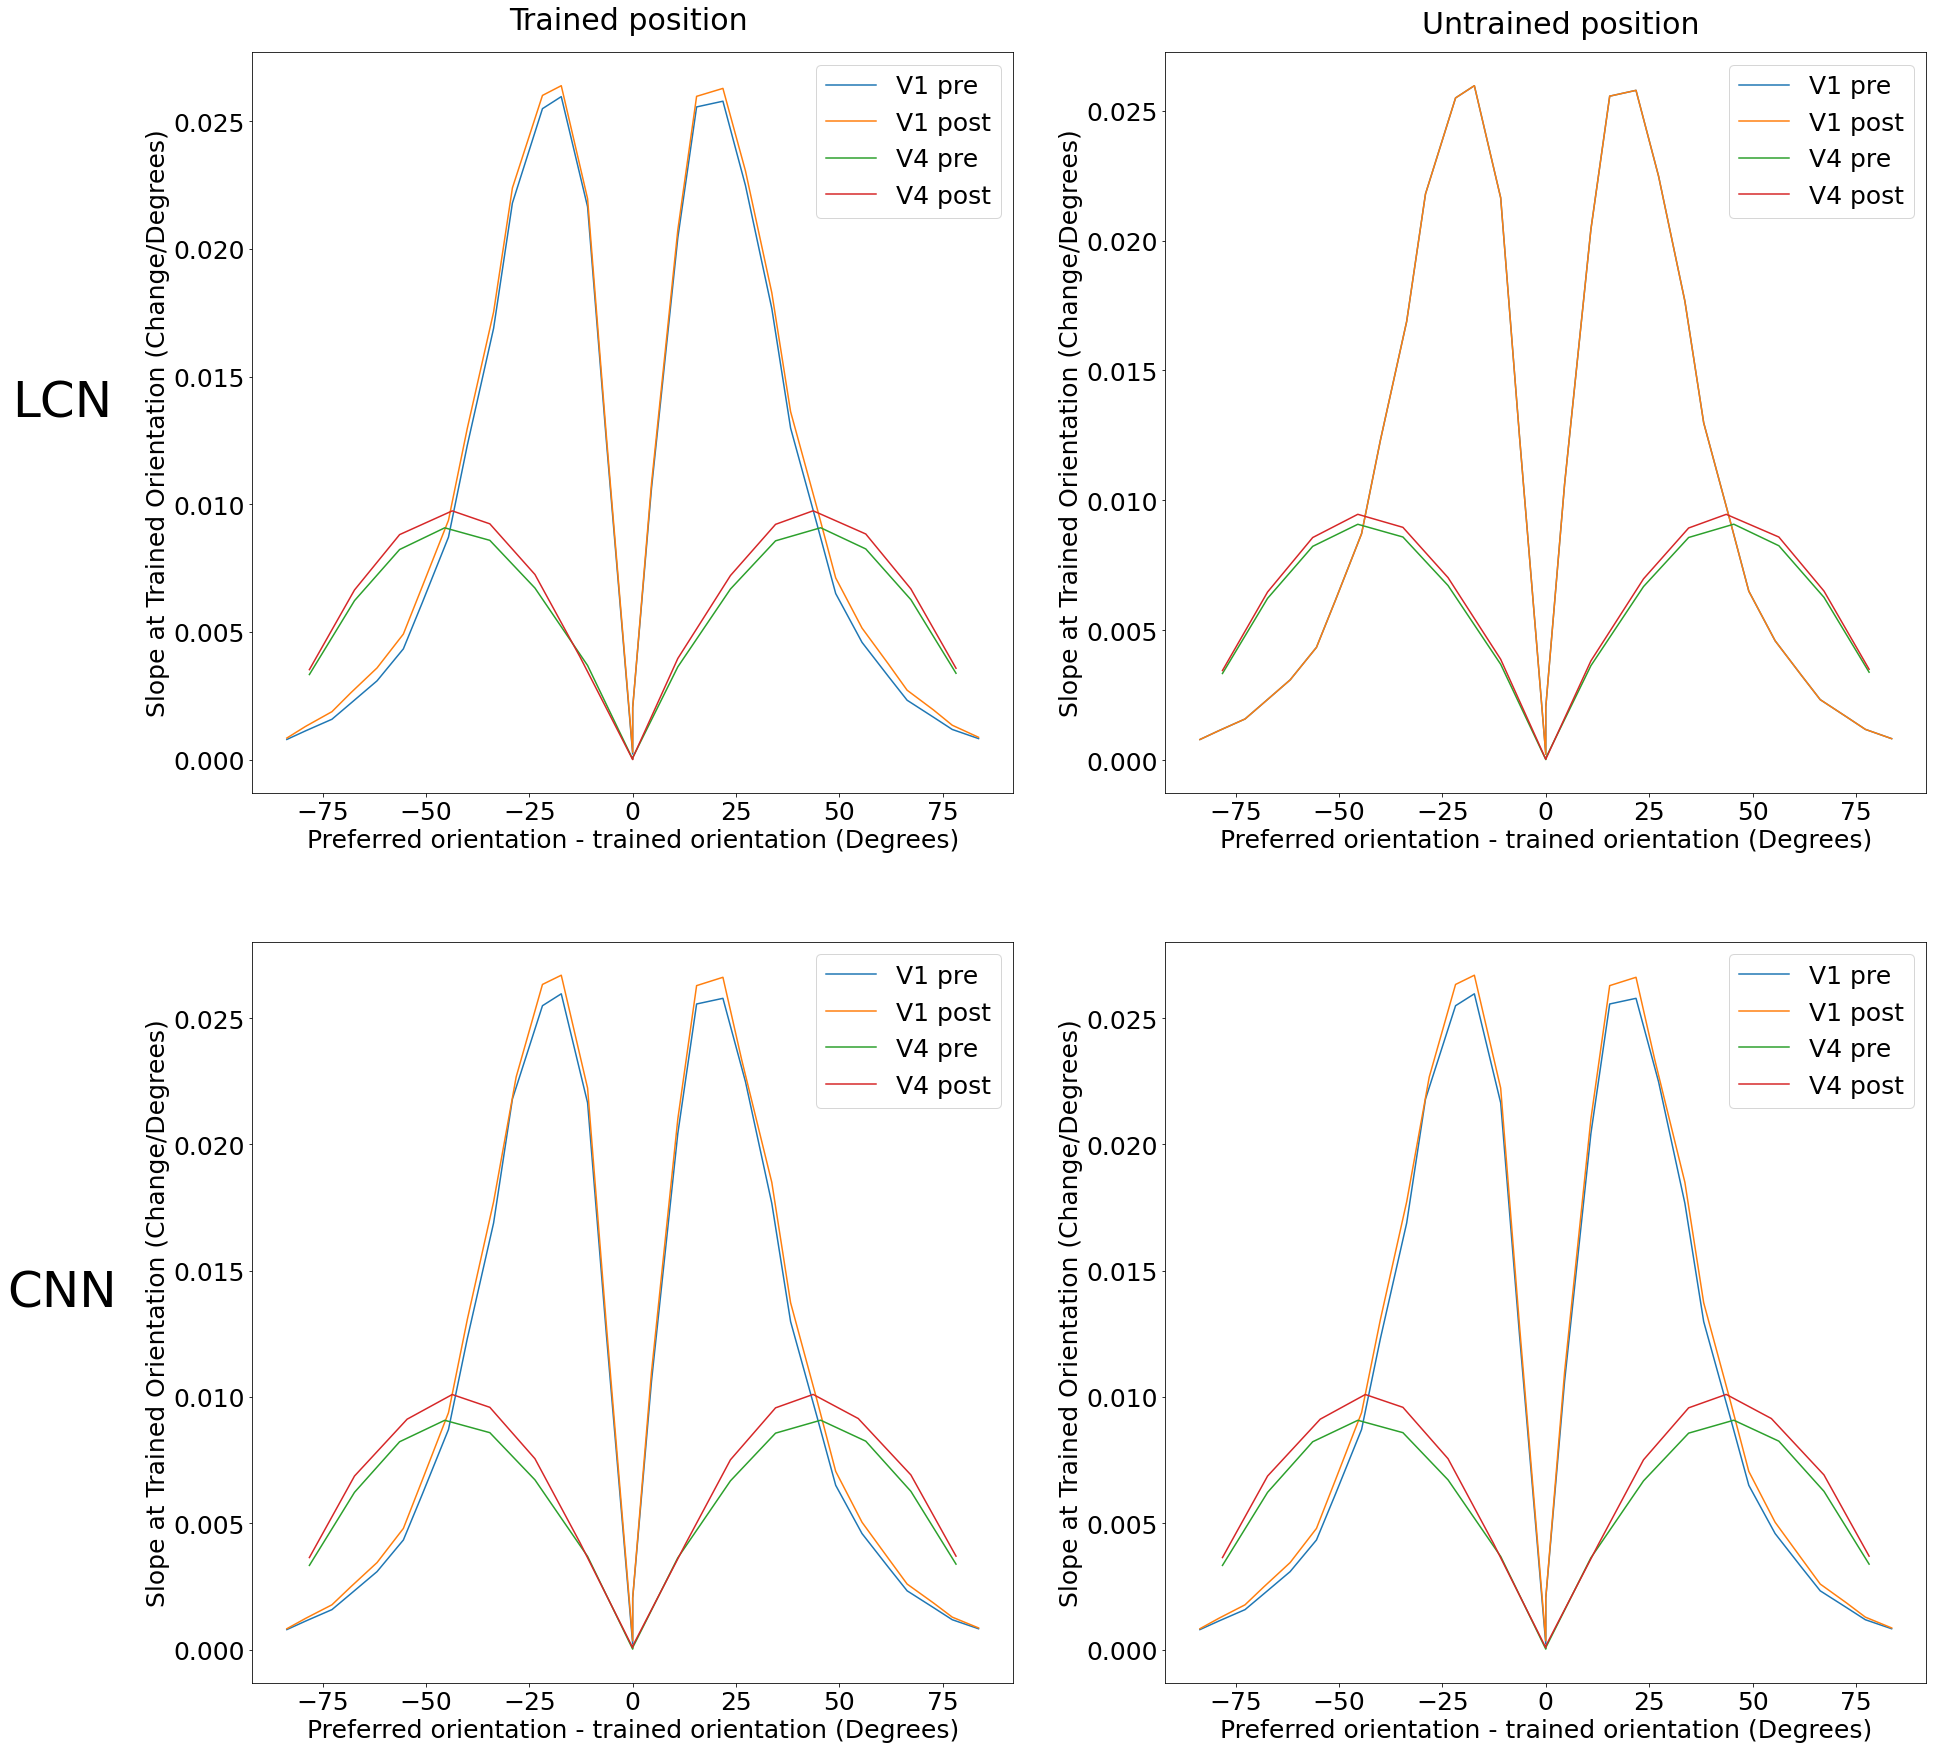

In [87]:
scales = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25]
v1_scale = 0.5
v4_scale = 2
j = np.abs((torch.tensor(scales) - v1_scale)).argmin().item()
i = np.abs((torch.tensor(scales) - v4_scale)).argmin().item()
  
    
fig, axs = plt.subplots(2, 2, figsize = (30, 30))
schoups_savepath = 'trained_models/high_fixed_normalized/weight_scale_' + str(scales[j]).replace('.', '') + '_001_' + str(scales[i]).replace('.', '') + '/'
schoups_v1_before_range = torch.load(schoups_savepath + "v1_before_range.pt")
schoups_v1_after_range = torch.load(schoups_savepath + "v1_after_range.pt")
schoups_v4_before_range = torch.load(schoups_savepath + "v4_before_range.pt")
schoups_v4_after_range = torch.load(schoups_savepath + "v4_after_range.pt")
schoups_v1_mean_before_slopes = torch.load(schoups_savepath + "v1_mean_before_slopes.pt")
schoups_v1_mean_after_slopes = torch.load(schoups_savepath + "v1_mean_after_slopes.pt")
schoups_v4_before_slopes = torch.load(schoups_savepath + "v4_before_slopes.pt")
schoups_v4_after_slopes = torch.load(schoups_savepath + "v4_after_slopes.pt")
axs[0, 0].plot(schoups_v1_before_range, schoups_v1_mean_before_slopes)
axs[0, 0].plot(schoups_v1_after_range, schoups_v1_mean_after_slopes)
axs[0, 0].plot(schoups_v4_before_range, schoups_v4_before_slopes)
axs[0, 0].plot(schoups_v4_after_range, schoups_v4_after_slopes)
axs[0, 0].set_title("LCN", fontsize = 50, x = -0.25, y = 0.5)
axs[0, 0].text(x = -30, y = 0.0286, s = "Trained position", fontsize = 30)

untrained_schoups_v1_before_range = torch.load(schoups_savepath + "untrained_v1_before_range.pt")
untrained_schoups_v1_after_range = torch.load(schoups_savepath + "untrained_v1_after_range.pt")
untrained_schoups_v4_before_range = torch.load(schoups_savepath + "untrained_v4_before_range.pt")
untrained_schoups_v4_after_range = torch.load(schoups_savepath + "untrained_v4_after_range.pt")
untrained_schoups_v1_mean_before_slopes = torch.load(schoups_savepath + "untrained_v1_mean_before_slopes.pt")
untrained_schoups_v1_mean_after_slopes = torch.load(schoups_savepath + "untrained_v1_mean_after_slopes.pt")
untrained_schoups_v4_before_slopes = torch.load(schoups_savepath + "untrained_v4_before_slopes.pt")
untrained_schoups_v4_after_slopes = torch.load(schoups_savepath + "untrained_v4_after_slopes.pt")
axs[0, 1].plot(untrained_schoups_v1_before_range, untrained_schoups_v1_mean_before_slopes)
axs[0, 1].plot(untrained_schoups_v1_after_range, untrained_schoups_v1_mean_after_slopes)
axs[0, 1].plot(untrained_schoups_v4_before_range, untrained_schoups_v4_before_slopes)
axs[0, 1].plot(untrained_schoups_v4_after_range, untrained_schoups_v4_after_slopes)
axs[0, 1].text(x = -30, y = 0.028, s = "Untrained position", fontsize = 30)


v1_scale = 1.25
v4_scale = 1.75
j = np.abs((torch.tensor(scales) - v1_scale)).argmin().item()
i = np.abs((torch.tensor(scales) - v4_scale)).argmin().item()

conv_savepath = 'trained_models/conv_high_fixed_normalized/weight_scale_' + str(scales[j]).replace('.', '') + '_001_' + str(scales[i]).replace('.', '') + '/'
conv_v1_before_range = torch.load(conv_savepath + "v1_before_range.pt")
conv_v1_after_range = torch.load(conv_savepath + "v1_after_range.pt")
conv_v4_before_range = torch.load(conv_savepath + "v4_before_range.pt")
conv_v4_after_range = torch.load(conv_savepath + "v4_after_range.pt")
conv_v1_mean_before_slopes = torch.load(conv_savepath + "v1_mean_before_slopes.pt")
conv_v1_mean_after_slopes = torch.load(conv_savepath + "v1_mean_after_slopes.pt")
conv_v4_before_slopes = torch.load(conv_savepath + "v4_before_slopes.pt")
conv_v4_after_slopes = torch.load(conv_savepath + "v4_after_slopes.pt")
axs[1, 0].plot(conv_v1_before_range, conv_v1_mean_before_slopes)
axs[1, 0].plot(conv_v1_after_range, conv_v1_mean_after_slopes)
axs[1, 0].plot(conv_v4_before_range, conv_v4_before_slopes)
axs[1, 0].plot(conv_v4_after_range, conv_v4_after_slopes)
axs[1, 0].set_title("CNN", fontsize = 50, x = -0.25, y =0.5) 
# axs[1, 0].text(x = -30, y = 0.029, s = "Trained position", fontsize = 30)


axs[1, 1].plot(conv_v1_before_range, conv_v1_mean_before_slopes)
axs[1, 1].plot(conv_v1_after_range, conv_v1_mean_after_slopes)
axs[1, 1].plot(conv_v4_before_range, conv_v4_before_slopes)
axs[1, 1].plot(conv_v4_after_range, conv_v4_after_slopes)

# axs[1, 1].text(x = -30, y = 0.029, s = "Untrained position", fontsize = 30)

for i in range(2):
    for j in range(2):
        axs[i, j].tick_params(axis = 'x', labelsize = 25)
        axs[i, j].tick_params(axis = 'y', labelsize = 25)
#         axs[0, j].get_xaxis().set_visible(False)
        axs[i, j].set_xlabel("Preferred orientation - trained orientation (Degrees)", fontsize = 25)
        axs[i, j].set_ylabel("Slope at Trained Orientation (Change/Degrees)", fontsize = 25)
        axs[i, j].legend(["V1 pre", "V1 post", "V4 pre", "V4 post"], fontsize = 25)
# plt.tight_layout()
plt.savefig("Fig 2.jpeg")


## Schoups vs Ghose 

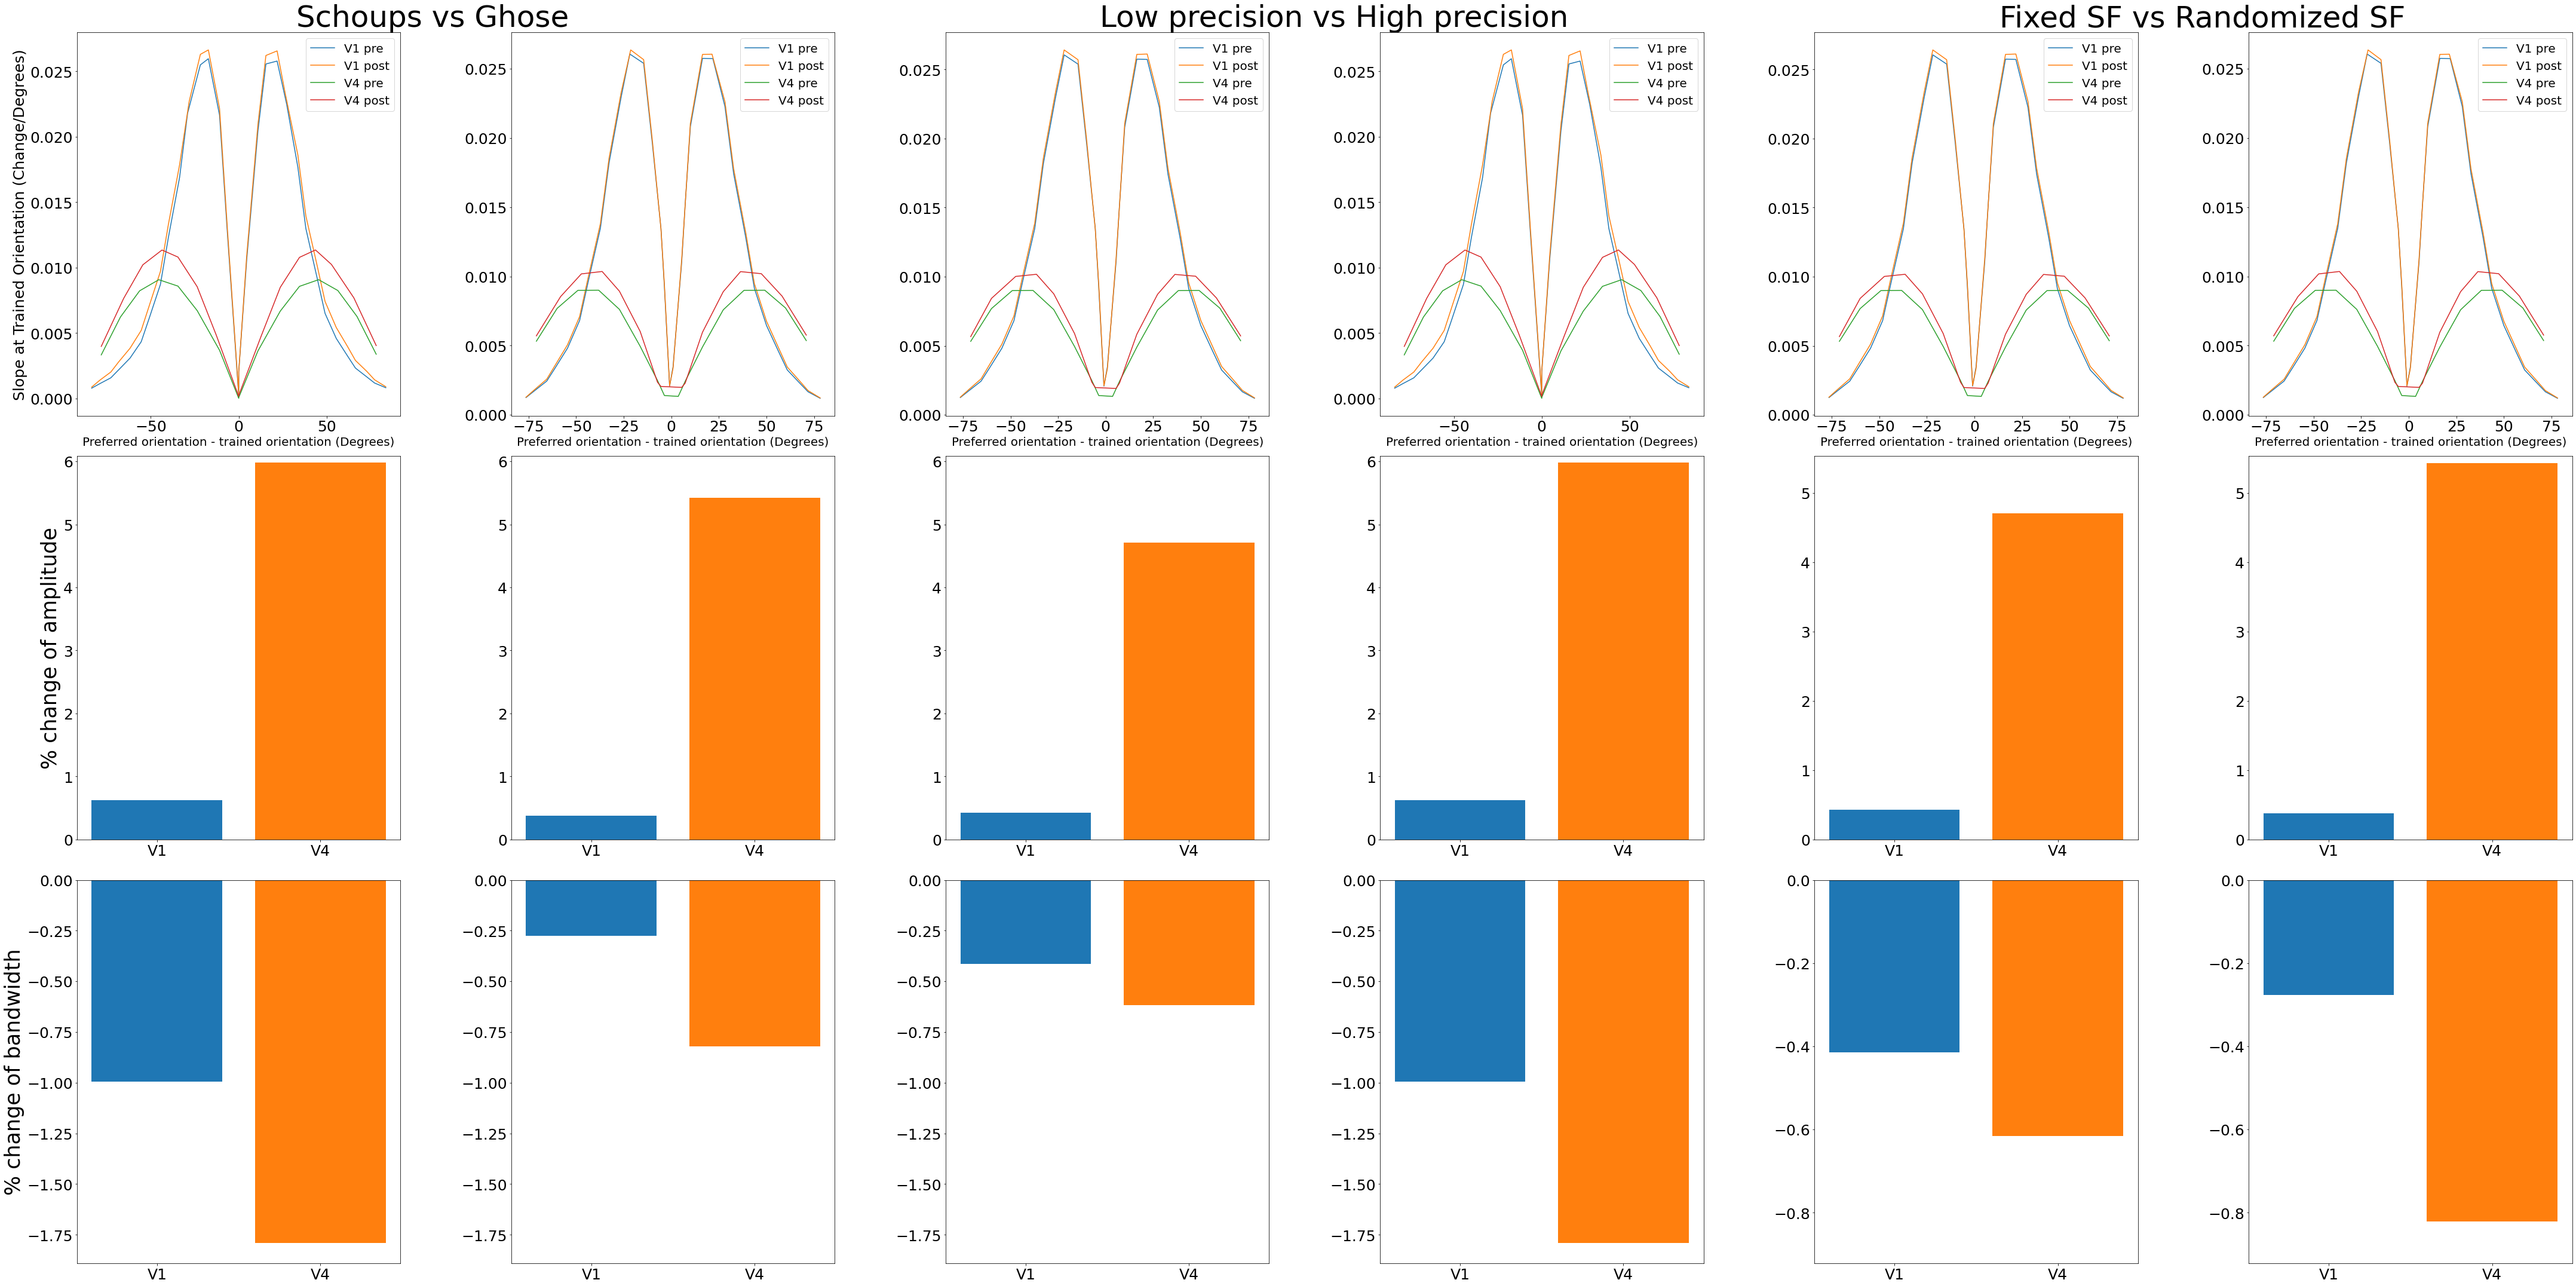

In [85]:
v1_scale = 0.5
phase_scale = 0.01
v4_scale = 1

model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'


fig, axs = plt.subplots(3, 6, figsize = (60, 30))

schoups_savepath = 'trained_models/high_fixed_normalized_long' + model
ghose_savepath = 'trained_models/low_randomized_normalized' + model

schoups_v1_before_range = torch.load(schoups_savepath + "v1_before_range.pt")
schoups_v1_after_range = torch.load(schoups_savepath + "v1_after_range.pt")
schoups_v4_before_range = torch.load(schoups_savepath + "v4_before_range.pt")
schoups_v4_after_range = torch.load(schoups_savepath + "v4_after_range.pt")
schoups_v1_mean_before_slopes = torch.load(schoups_savepath + "v1_mean_before_slopes.pt")
schoups_v1_mean_after_slopes = torch.load(schoups_savepath + "v1_mean_after_slopes.pt")
schoups_v4_before_slopes = torch.load(schoups_savepath + "v4_before_slopes.pt")
schoups_v4_after_slopes = torch.load(schoups_savepath + "v4_after_slopes.pt")
axs[0, 0].set_title("Schoups vs Ghose", fontsize = 50, x = 1.1)
axs[0, 0].plot(schoups_v1_before_range, schoups_v1_mean_before_slopes)
axs[0, 0].plot(schoups_v1_after_range, schoups_v1_mean_after_slopes)
axs[0, 0].plot(schoups_v4_before_range, schoups_v4_before_slopes)
axs[0, 0].plot(schoups_v4_after_range, schoups_v4_after_slopes)
axs[0, 0].set_ylabel("Slope at Trained Orientation (Change/Degrees)", fontsize = 25)

ghose_v1_before_range = torch.load(ghose_savepath + "v1_before_range.pt")
ghose_v1_after_range = torch.load(ghose_savepath + "v1_after_range.pt")
ghose_v4_before_range = torch.load(ghose_savepath + "v4_before_range.pt")
ghose_v4_after_range = torch.load(ghose_savepath + "v4_after_range.pt")
ghose_v1_mean_before_slopes = torch.load(ghose_savepath + "v1_mean_before_slopes.pt")
ghose_v1_mean_after_slopes = torch.load(ghose_savepath + "v1_mean_after_slopes.pt")
ghose_v4_before_slopes = torch.load(ghose_savepath + "v4_before_slopes.pt")
ghose_v4_after_slopes = torch.load(ghose_savepath + "v4_after_slopes.pt")
axs[0, 1].plot(ghose_v1_before_range, ghose_v1_mean_before_slopes)
axs[0, 1].plot(ghose_v1_after_range, ghose_v1_mean_after_slopes)
axs[0, 1].plot(ghose_v4_before_range, ghose_v4_before_slopes)
axs[0, 1].plot(ghose_v4_after_range, ghose_v4_after_slopes)


schoups_v1_amplitude_difference = torch.load(schoups_savepath + "v1_amplitude.pt")
schoups_v4_amplitude_difference = torch.load(schoups_savepath + "v4_amplitude.pt")
ghose_v1_amplitude_difference = torch.load(ghose_savepath + "v1_amplitude.pt")
ghose_v4_amplitude_difference = torch.load(ghose_savepath + "v4_amplitude.pt")
axs[1, 0].bar(["V1", "V4"], [schoups_v1_amplitude_difference, schoups_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 0].set_ylabel("% change of amplitude", fontsize = 35);
axs[1, 0].set_ylim(0, np.max([schoups_v1_amplitude_difference, schoups_v4_amplitude_difference, 
                              ghose_v1_amplitude_difference, ghose_v4_amplitude_difference]) + 0.1)

axs[1, 1].bar(["V1", "V4"], [ghose_v1_amplitude_difference, ghose_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 1].set_ylim(0, np.max([schoups_v1_amplitude_difference, schoups_v4_amplitude_difference, 
                              ghose_v1_amplitude_difference, ghose_v4_amplitude_difference]) + 0.1)

schoups_v1_bandwidth_difference = torch.load(schoups_savepath + "v1_bandwidth.pt")
schoups_v4_bandwidth_difference = torch.load(schoups_savepath + "v4_bandwidth.pt")
ghose_v1_bandwidth_difference = torch.load(ghose_savepath + "v1_bandwidth.pt")
ghose_v4_bandwidth_difference = torch.load(ghose_savepath + "v4_bandwidth.pt")
axs[2, 0].bar(["V1", "V4"], [schoups_v1_bandwidth_difference, schoups_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 0].set_ylabel("% change of bandwidth", fontsize = 35);
axs[2, 0].set_ylim(np.min([schoups_v1_bandwidth_difference, schoups_v4_bandwidth_difference, 
                           ghose_v1_bandwidth_difference, ghose_v4_bandwidth_difference]) - 0.1, 0)

axs[2, 1].bar(["V1", "V4"], [ghose_v1_bandwidth_difference, ghose_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 1].set_ylim(np.min([schoups_v1_bandwidth_difference, schoups_v4_bandwidth_difference, 
                           ghose_v1_bandwidth_difference, ghose_v4_bandwidth_difference]) - 0.1, 0)


low_savepath = 'trained_models/low_fixed_normalized' + model
high_savepath = 'trained_models/high_fixed_normalized_long' + model

low_v1_before_range = torch.load(low_savepath + "v1_before_range.pt")
low_v1_after_range = torch.load(low_savepath + "v1_after_range.pt")
low_v4_before_range = torch.load(low_savepath + "v4_before_range.pt")
low_v4_after_range = torch.load(low_savepath + "v4_after_range.pt")
low_v1_mean_before_slopes = torch.load(low_savepath + "v1_mean_before_slopes.pt")
low_v1_mean_after_slopes = torch.load(low_savepath + "v1_mean_after_slopes.pt")
low_v4_before_slopes = torch.load(low_savepath + "v4_before_slopes.pt")
low_v4_after_slopes = torch.load(low_savepath + "v4_after_slopes.pt")
axs[0, 2].set_title("Low precision vs High precision", fontsize = 50, x = 1.2)
axs[0, 2].plot(low_v1_before_range, low_v1_mean_before_slopes)
axs[0, 2].plot(low_v1_after_range, low_v1_mean_after_slopes)
axs[0, 2].plot(low_v4_before_range, low_v4_before_slopes)
axs[0, 2].plot(low_v4_after_range, low_v4_after_slopes)

high_v1_before_range = torch.load(high_savepath + "v1_before_range.pt")
high_v1_after_range = torch.load(high_savepath + "v1_after_range.pt")
high_v4_before_range = torch.load(high_savepath + "v4_before_range.pt")
high_v4_after_range = torch.load(high_savepath + "v4_after_range.pt")
high_v1_mean_before_slopes = torch.load(high_savepath + "v1_mean_before_slopes.pt")
high_v1_mean_after_slopes = torch.load(high_savepath + "v1_mean_after_slopes.pt")
high_v4_before_slopes = torch.load(high_savepath + "v4_before_slopes.pt")
high_v4_after_slopes = torch.load(high_savepath + "v4_after_slopes.pt")
axs[0, 3].plot(high_v1_before_range, high_v1_mean_before_slopes)
axs[0, 3].plot(high_v1_after_range, high_v1_mean_after_slopes)
axs[0, 3].plot(high_v4_before_range, high_v4_before_slopes)
axs[0, 3].plot(high_v4_after_range, high_v4_after_slopes)
axs[0, 3].legend(["V1 pre", "V1 post", "V4 pre", "V4 post"], fontsize = 20)

low_v1_amplitude_difference = torch.load(low_savepath + "v1_amplitude.pt")
low_v4_amplitude_difference = torch.load(low_savepath + "v4_amplitude.pt")
high_v1_amplitude_difference = torch.load(high_savepath + "v1_amplitude.pt")
high_v4_amplitude_difference = torch.load(high_savepath + "v4_amplitude.pt")
axs[1, 2].bar(["V1", "V4"], [low_v1_amplitude_difference, low_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 2].set_ylim(0, np.max([high_v1_amplitude_difference, high_v4_amplitude_difference, 
                              low_v1_amplitude_difference, low_v4_amplitude_difference]) + 0.1)

axs[1, 3].bar(["V1", "V4"], [high_v1_amplitude_difference, high_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 3].set_ylim(0, np.max([high_v1_amplitude_difference, high_v4_amplitude_difference, 
                              low_v1_amplitude_difference, low_v4_amplitude_difference]) + 0.1)

low_v1_bandwidth_difference = torch.load(low_savepath + "v1_bandwidth.pt")
low_v4_bandwidth_difference = torch.load(low_savepath + "v4_bandwidth.pt")
high_v1_bandwidth_difference = torch.load(high_savepath + "v1_bandwidth.pt")
high_v4_bandwidth_difference = torch.load(high_savepath + "v4_bandwidth.pt")
axs[2, 2].bar(["V1", "V4"], [low_v1_bandwidth_difference, low_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 2].set_ylim(np.min([high_v1_bandwidth_difference, high_v4_bandwidth_difference, 
                           low_v1_bandwidth_difference, low_v4_bandwidth_difference]) - 0.1, 0)


axs[2, 3].bar(["V1", "V4"], [high_v1_bandwidth_difference, high_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 3].set_ylim(np.min([high_v1_bandwidth_difference, high_v4_bandwidth_difference, 
                           low_v1_bandwidth_difference, low_v4_bandwidth_difference]) - 0.1, 0)



fixed_savepath = 'trained_models/low_fixed_normalized' + model
randomized_savepath = 'trained_models/low_randomized_normalized' + model

fixed_v1_before_range = torch.load(fixed_savepath + "v1_before_range.pt")
fixed_v1_after_range = torch.load(fixed_savepath + "v1_after_range.pt")
fixed_v4_before_range = torch.load(fixed_savepath + "v4_before_range.pt")
fixed_v4_after_range = torch.load(fixed_savepath + "v4_after_range.pt")
fixed_v1_mean_before_slopes = torch.load(fixed_savepath + "v1_mean_before_slopes.pt")
fixed_v1_mean_after_slopes = torch.load(fixed_savepath + "v1_mean_after_slopes.pt")
fixed_v4_before_slopes = torch.load(fixed_savepath + "v4_before_slopes.pt")
fixed_v4_after_slopes = torch.load(fixed_savepath + "v4_after_slopes.pt")
axs[0, 4].set_title("Fixed SF vs Randomized SF", fontsize = 50, x = 1.2)
axs[0, 4].plot(fixed_v1_before_range, fixed_v1_mean_before_slopes)
axs[0, 4].plot(fixed_v1_after_range, fixed_v1_mean_after_slopes)
axs[0, 4].plot(fixed_v4_before_range, fixed_v4_before_slopes)
axs[0, 4].plot(fixed_v4_after_range, fixed_v4_after_slopes)

randomized_v1_before_range = torch.load(randomized_savepath + "v1_before_range.pt")
randomized_v1_after_range = torch.load(randomized_savepath + "v1_after_range.pt")
randomized_v4_before_range = torch.load(randomized_savepath + "v4_before_range.pt")
randomized_v4_after_range = torch.load(randomized_savepath + "v4_after_range.pt")
randomized_v1_mean_before_slopes = torch.load(randomized_savepath + "v1_mean_before_slopes.pt")
randomized_v1_mean_after_slopes = torch.load(randomized_savepath + "v1_mean_after_slopes.pt")
randomized_v4_before_slopes = torch.load(randomized_savepath + "v4_before_slopes.pt")
randomized_v4_after_slopes = torch.load(randomized_savepath + "v4_after_slopes.pt")
axs[0, 5].plot(randomized_v1_before_range, randomized_v1_mean_before_slopes)
axs[0, 5].plot(randomized_v1_after_range, randomized_v1_mean_after_slopes)
axs[0, 5].plot(randomized_v4_before_range, randomized_v4_before_slopes)
axs[0, 5].plot(randomized_v4_after_range, randomized_v4_after_slopes)

fixed_v1_amplitude_difference = torch.load(fixed_savepath + "v1_amplitude.pt")
fixed_v4_amplitude_difference = torch.load(fixed_savepath + "v4_amplitude.pt")
randomized_v1_amplitude_difference = torch.load(randomized_savepath + "v1_amplitude.pt")
randomized_v4_amplitude_difference = torch.load(randomized_savepath + "v4_amplitude.pt")
axs[1, 4].bar(["V1", "V4"], [fixed_v1_amplitude_difference, fixed_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 4].set_ylim(0, np.max([fixed_v1_amplitude_difference, fixed_v4_amplitude_difference, 
                              randomized_v1_amplitude_difference, randomized_v4_amplitude_difference]) + 0.1)

axs[1, 5].bar(["V1", "V4"], [randomized_v1_amplitude_difference, randomized_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 5].set_ylim(0, np.max([fixed_v1_amplitude_difference, fixed_v4_amplitude_difference, 
                              randomized_v1_amplitude_difference, randomized_v4_amplitude_difference]) + 0.1)


fixed_v1_bandwidth_difference = torch.load(fixed_savepath + "v1_bandwidth.pt")
fixed_v4_bandwidth_difference = torch.load(fixed_savepath + "v4_bandwidth.pt")
randomized_v1_bandwidth_difference = torch.load(randomized_savepath + "v1_bandwidth.pt")
randomized_v4_bandwidth_difference = torch.load(randomized_savepath + "v4_bandwidth.pt")
axs[2, 4].bar(["V1", "V4"], [fixed_v1_bandwidth_difference, fixed_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 4].set_ylim(np.min([fixed_v1_bandwidth_difference, fixed_v4_bandwidth_difference, 
                           randomized_v1_bandwidth_difference, randomized_v4_bandwidth_difference]) - 0.1, 0)

axs[2, 5].bar(["V1", "V4"], [randomized_v1_bandwidth_difference, randomized_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 5].set_ylim(np.min([fixed_v1_bandwidth_difference, fixed_v4_bandwidth_difference, 
                           randomized_v1_bandwidth_difference, randomized_v4_bandwidth_difference]) - 0.1, 0)



for i in range(3):
    for j in range(6):
        axs[i, j].tick_params(axis = 'x', labelsize = 25)
        axs[i, j].tick_params(axis = 'y', labelsize = 25)
        axs[0, j].set_xlabel("Preferred orientation - trained orientation (Degrees)", fontsize = 20)
        axs[0, j].legend(["V1 pre", "V1 post", "V4 pre", "V4 post"], fontsize = 20)


plt.tight_layout()
plt.savefig("Fig 3.jpeg")


## Peak point of change

49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.35483870967743 44.494949494949495 0.7
49.3548387096774

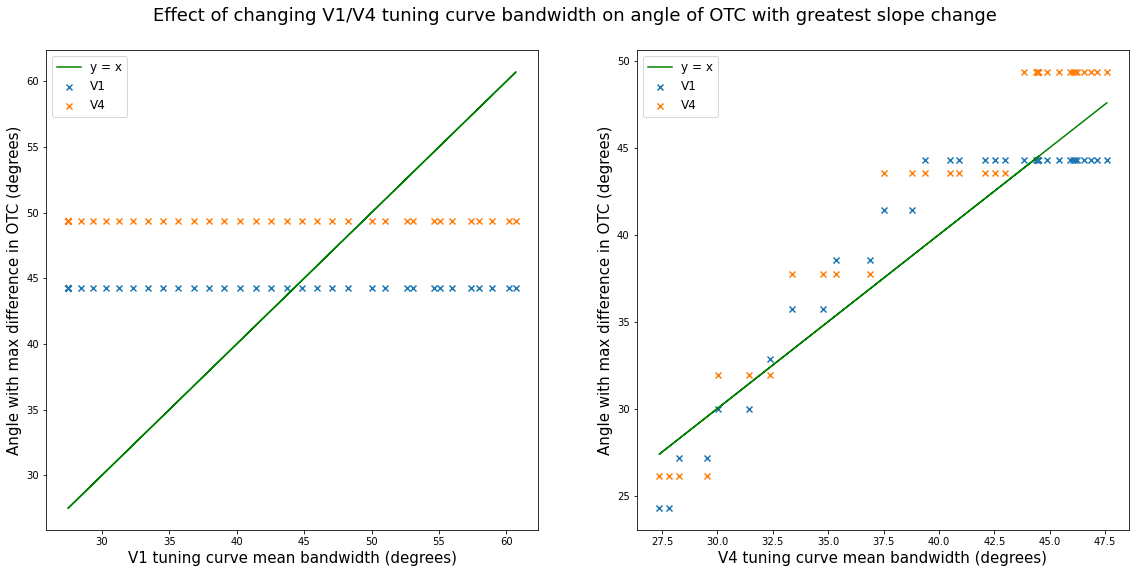

In [7]:
# v1_gammas = [i/10 for i in range(5, 16)]
# v4_orientation_stds = [i/10 for i in range(1, 11)]
v1_gammas = list(np.linspace(0.5, 1.6, 32)) + [0.5] * 32
v4_orientation_stds = [0.7] * 32 + list(np.linspace(0.1, 1, 32))
v1_xs = []
v1_ys = []
v1_v4_ys = []
v4_xs = []
v4_ys = []
v4_v1_ys = []


for i in range(len(v1_gammas)):
    try:
#         v1_gamma_savepath = 'trained_models/changing_bandwidths_2/' + str(v1_gammas[i]).replace('.', '') + '_07/v1_max_diff_angle.pt'
#         v4_gamma_savepath = 'trained_models/changing_bandwidths_2/' + str(v1_gammas[i]).replace('.', '') + '_07/v4_max_diff_angle.pt'
#         v1_bandwidth_savepath = 'trained_models/changing_bandwidths_2/' + str(v1_gammas[i]).replace('.', '') + '_07/v1_bandwidth.pt'

        
        v1_gamma_savepath = 'trained_models/changing_bandwidths_4/' + str(round(v1_gammas[i], 2)).replace('.', '') + '_07/v1_max_diff_angle.pt'
        v4_gamma_savepath = 'trained_models/changing_bandwidths_4/' + str(round(v1_gammas[i], 2)).replace('.', '') + '_07/v4_max_diff_angle.pt'
        v1_bandwidth_savepath = 'trained_models/changing_bandwidths_4/' + str(round(v1_gammas[i], 2)).replace('.', '') + '_07/v1_bandwidth.pt'

        v1_gamma = torch.load(v1_gamma_savepath)
        v4_gamma = torch.load(v4_gamma_savepath)
        v1_bandwidth = torch.load(v1_bandwidth_savepath)

        v1_xs.append(v1_bandwidth)
        v1_ys.append(v1_gamma)
        v1_v4_ys.append(v4_gamma)
    except:
        pass
    
for j in range(len(v4_orientation_stds)):
    try:
#         v4_orientation_std_savepath = 'trained_models/changing_bandwidths_2/05_' + str(v4_orientation_stds[j]).replace('.', '') + '/v4_max_diff_angle.pt'
#         v1_orientation_std_savepath = 'trained_models/changing_bandwidths_2/05_' + str(v4_orientation_stds[j]).replace('.', '') + '/v1_max_diff_angle.pt'
#         v4_bandwidth_savepath = 'trained_models/changing_bandwidths_2/05_' + str(v4_orientation_stds[j]).replace('.', '') + '/v4_bandwidth.pt'

        
        v4_orientation_std_savepath = 'trained_models/changing_bandwidths_4/05_' + str(round(v4_orientation_stds[j], 2)).replace('.', '') + '/v4_max_diff_angle.pt'
        v1_orientation_std_savepath = 'trained_models/changing_bandwidths_4/05_' + str(round(v4_orientation_stds[j], 2)).replace('.', '') + '/v1_max_diff_angle.pt'
        v4_bandwidth_savepath = 'trained_models/changing_bandwidths_4/05_' + str(round(v4_orientation_stds[j], 2)).replace('.', '') + '/v4_bandwidth.pt'

        v4_orientation_std = torch.load(v4_orientation_std_savepath)
        v1_orientation_std = torch.load(v1_orientation_std_savepath)
        v4_bandwidth = torch.load(v4_bandwidth_savepath)
        print(v4_orientation_std, v4_bandwidth, v4_orientation_stds[j])

        v4_xs.append(v4_bandwidth)
        v4_ys.append(v4_orientation_std)
        v4_v1_ys.append(v1_orientation_std)

    except:
        pass
        
plt.figure(figsize = (30, 30))

plt.subplot(3, 3, 1)
plt.scatter(v1_xs, v1_ys, marker = "x")
plt.scatter(v1_xs, v1_v4_ys, marker = "x")
plt.plot(v1_xs, v1_xs, color = 'g')
plt.xlabel("V1 tuning curve mean bandwidth (degrees)", fontsize = 15)
plt.ylabel("Angle with max difference in OTC (degrees)", fontsize = 15)
plt.legend(["y = x", "V1", "V4"], fontsize = 12);
plt.suptitle("Effect of changing V1/V4 tuning curve bandwidth on angle of OTC with greatest slope change", x = 0.37, y = 0.9, fontsize = 18)

plt.subplot(3, 3, 2)
plt.scatter(v4_xs, v4_v1_ys, marker = "x")
plt.scatter(v4_xs, v4_ys, marker = "x")
plt.plot(v4_xs, v4_xs, color = 'g')
plt.xlabel("V4 tuning curve mean bandwidth (degrees)", fontsize = 15)
plt.ylabel("Angle with max difference in OTC (degrees)", fontsize = 15)
plt.legend(["y = x", "V1", "V4"], fontsize = 12);

# plt.savefig("Fig 4.jpeg")

/tmp/56753550.1.short.qc/ipykernel_45824/1974848706.py:14: RuntimeWarning: divide by zero encountered in log10
  x= np.log10(y)


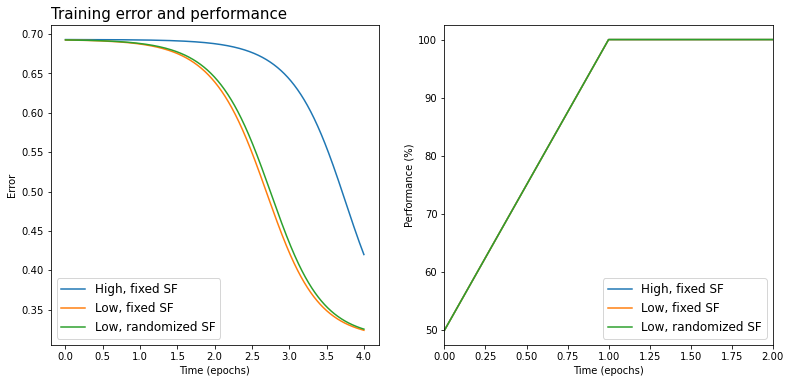

In [11]:
v1_scale = 0.5
phase_scale = 0.01
v4_scale = 2
savepath = 'trained_models/'
model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'
schoups_error = torch.load(savepath + 'high_fixed_normalized' + model + 'loss.pt')
schoups_performance = torch.load(savepath + 'high_fixed_normalized' + model + 'performance.pt')
ghose_error = torch.load(savepath + 'low_randomized_normalized' + model + 'loss.pt')
ghose_performance = torch.load(savepath + 'low_randomized_normalized' + model + 'performance.pt')
low_error = torch.load(savepath + 'low_fixed_normalized' + model + 'loss.pt')
low_performance = torch.load(savepath + 'low_fixed_normalized' + model + 'performance.pt')

plt.figure(figsize = [20, 20])
plt.subplot(3, 3, 1)
plt.plot(range(10000), schoups_error)
plt.plot(range(10000), low_error)
plt.plot(range(10000), ghose_error)
plt.xlabel("Time (epochs)")
plt.ylabel("Error")
plt.legend(["High, fixed SF", "Low, fixed SF", "Low, randomized SF"], fontsize = 12);
plt.title("Training error and performance", loc = "left", fontsize = 15)

plt.subplot(3, 3, 2)
plt.plot(range(10000), schoups_performance)
plt.plot(range(10000), low_performance)
plt.plot(range(10000), ghose_performance)
plt.xlabel("Time (epochs)")
plt.ylabel("Performance (%)")
plt.legend(["High, fixed SF", "Low, fixed SF", "Low, randomized SF"], fontsize = 12);
plt.savefig("Supplemetary fig 1.png")

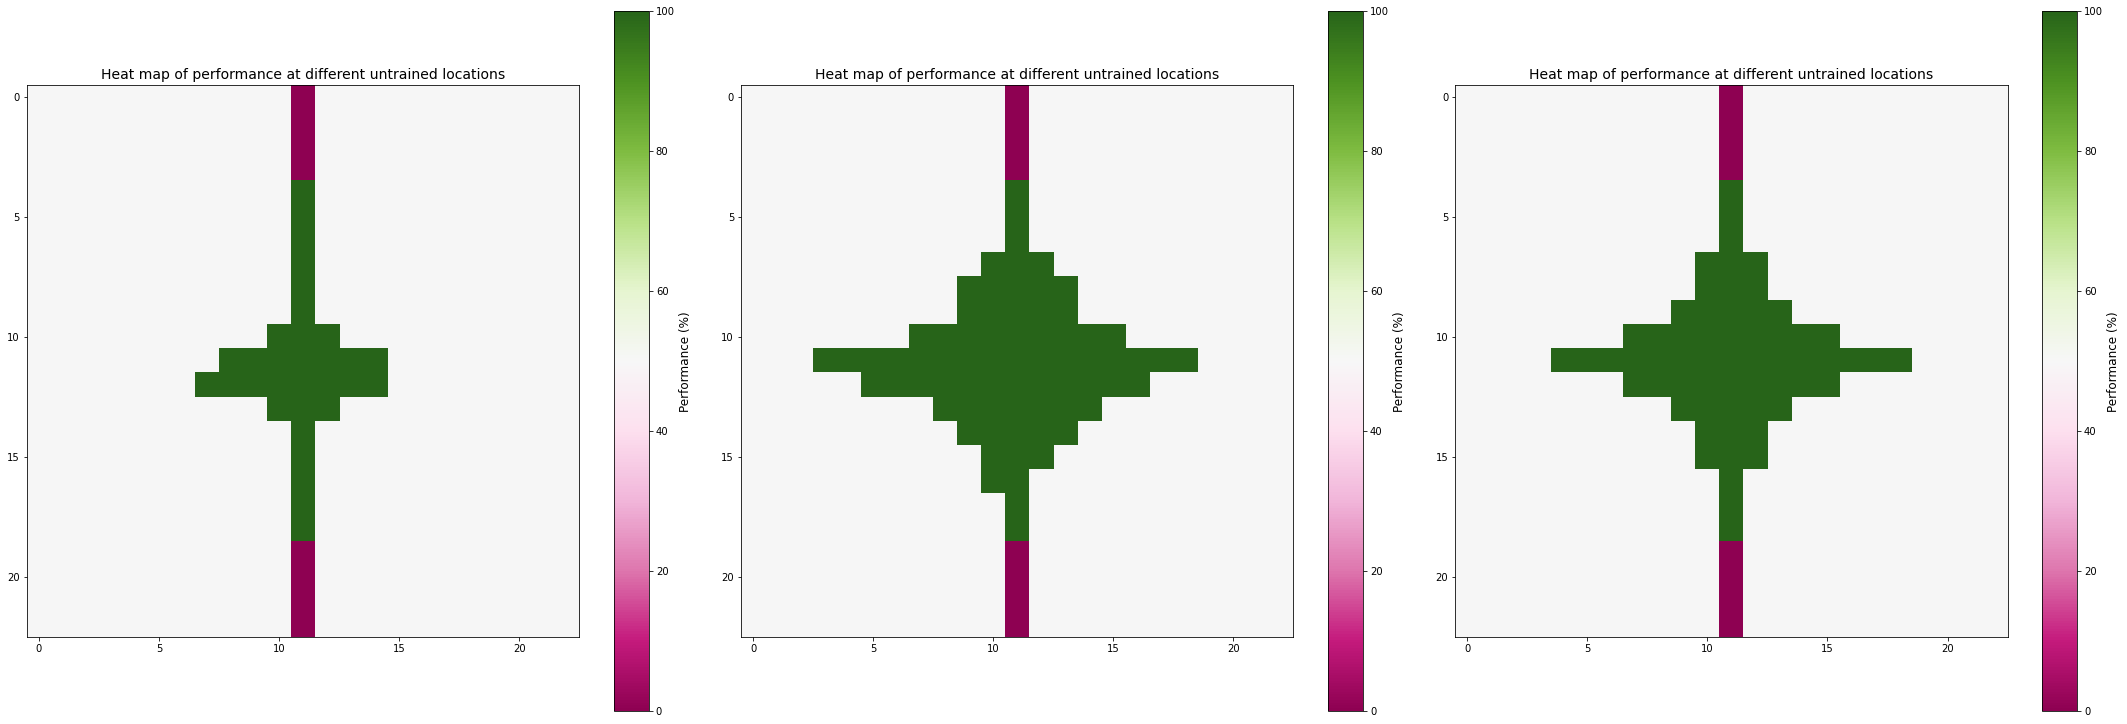

In [39]:
v1_scale = 0.5
phase_scale = 0.01
v4_scale = 1
savepath = 'trained_models/'
model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'

plt.figure(figsize = [30, 30])
plt.subplot(3, 3, 1)
schoups_transfer = torch.load(savepath + "high_fixed_normalized" + model + "transfer_performance.pt")
plt.imshow(schoups_transfer, cmap = 'PiYG', vmin = 0, vmax = 100)
plt.colorbar().set_label(label = 'Performance (%)', size = 12)
plt.title("Heat map of performance at different untrained locations", fontsize = 14)

plt.subplot(3, 3, 2)
low_transfer = torch.load(savepath + "low_fixed_normalized" + model + "transfer_performance.pt")
plt.imshow(low_transfer, cmap = 'PiYG', vmin = 0, vmax = 100)
plt.colorbar().set_label(label = 'Performance (%)', size = 12)
plt.title("Heat map of performance at different untrained locations", fontsize = 14)

plt.subplot(3, 3, 3)
ghose_transfer = torch.load(savepath + "low_randomized_normalized" + model + "transfer_performance.pt")
plt.imshow(ghose_transfer, cmap = 'PiYG', vmin = 0, vmax = 100)
plt.colorbar().set_label(label = 'Performance (%)', size = 12)
plt.title("Heat map of performance at different untrained locations", fontsize = 14)
                          
                          
plt.tight_layout()


In [3]:
a = [3, 4, 4] 
b =[2, 1, 3]
[a[i] - b[i] for i in range(len(a))]

[1, 3, 1]